In [1]:
# Import functions 
import sys
sys.path.insert(0, '../..')
from utils import *   

In [2]:
# Start ROS Node
rospy.init_node('racecar')
rc = Racecar()
print('ROS node started successfully')

ROS node started successfully


# Sign Detection Lab

<p style='font-size:1.75rem;line-height:1.5'>
    Let's create a program to <b style="color:magenta">track an object</b> (ie. Traffic Signs) using its <b style="color:magenta">features</b> in a video!
    </p> 

<p style='font-size:1.75rem;line-height:1.5'>
    In this lab, we will learn how to: 
    <ul style='font-size:1.75rem;line-height:2'>
        <li><b style="color:blue">DRAW features</b> on images using: <code>cv2.drawKeypoints</code></li>
        <li><b style="color:green">DETECT features</b> of an image using the <code>ORB</code> feature detection algorithm</li>
        <li><b style="color:orange">FIND matches</b> between images via <code>FLANN</code></li>
    </ul>
    </p> 
   

# Detecting Features

## What are Features?

<p style='font-size:1.75rem;line-height:1.5'>
    <b style="color:blue">Features (keypoints)</b> are <b style="color:blue">distinct and easily recognizable</b> regions of an image. 
    </p>

## Why ORB?

<p style='font-size:1.75rem;line-height:1.5'>
    ORB is an open-source feature detection algorithm available in OpenCV. 
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    Compared to other feature detection algorithms (ie. SIFT and SURF), ORB detects less features, but it is faster! 
    </p>

## Creating an ORB Object

<p style='font-size:1.75rem;line-height:1.5'>
    In order to tell OpenCV that we want to use the ORB feature detection algorithm, we need to create an ORB object first using <code>cv2.ORB_create</code>. This function takes in one argument: <code>nFeatures</code>, which specifies the maximum number of features we want to find in the image. The default value is <code>500</code>.
    </p>
    
 
<p style='font-size:1.75rem;line-height:1.5'>
    Creating the ORB object has the following format:
    </p> 

```python
orb = cv2.ORB_create(nFeatures)
```

## Detecting Features

<p style='font-size:1.75rem;line-height:1.5'>
    Next we need to find all the features in the image! We can get ORB features using <code>orb.detectAndCompute</code>. Note that this function can only take in <b>grayscale images</b>.
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    It has the following format:
    </p> 

```python
keypoints, descriptors = orb.detectAndCompute(<grayscale_image>, None)
```

## Drawing Features

<p style='font-size:1.75rem;line-height:1.5'>
    To see what keypoints look like, use the <b style="color:blue">draw keypoints</b> function to draw keypoints on an image. 
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    It has the following format:
    </p>

```python
cv2.drawKeypoints(<image>, <keypoints>, <image>, flags=5)
```
    
<p style='font-size:1.75rem;line-height:1.5'>
    <b style="color:red">Exercise:</b> 
    <br> Get the <b>features</b> from <code>one_way.jpg</code> using <b>ORB</b>.
    </p>

In [3]:
# Set the maximum number of features detected via nFeature
nFeatures = None      # Tweak this number to see how it changes the number of features detected!

In [4]:
# TASK #1: Read "one_way.jpg". Save as 'img'


# TASK #2: Convert BGR image to grayscale via cv2.cvtColor


# TASK #3: Create an ORB object


# TASK #4: Get keypoints of the grayscale image via orb.detectAndCompute


# TASK #5: Draw the keypoints onto the image via cv2.drawKeypoints


# show local image
show_picture(img)

# Print # keypoints detected and # nFeatures
print("# ORB Keypoints: {}, nFeatures = {}".format(len(keypoints), nFeatures))

''

# ORB Keypoints: 363, nFeatures = 500



---


# Detecting Live Traffic Signs

<p style='font-size:1.75rem;line-height:1.5'>
    We just learned how to create an ORB object, and how to detect and draw features. Nice!
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    Now, let's create some functions that will help us <b style="color:green">detect and track a one way sign</b> in a <b style="color:blue">live video stream</b> using <b>ORB</b>!
    </p>

# <code>get_keypoints</code>

<p style='font-size:1.75rem;line-height:1.5'>
    So that it is easier for us to find keypoints again in the future, let's create a function that creates an orb object, detects image features, and returns the keypoints and descriptors! 
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    Finish the function below using the functions we learned above.
    </p>

In [7]:
def get_keypoints(image):
    # TASK #1: Create an orb object

    
    # TASK #2: Detect and compute the image features/descriptors

    
    # TASK #3: Return the keypoints and descriptors


# <code>calculate_matches</code>

<p style='font-size:1.75rem;line-height:1.5'>
    Now we need to <b style="color:blue">match the keypoints</b> from the one way sign with keypoints from the video frames. 
    <br>We can use use <code>flann.knnMatch</code> to <b style="color:blue">define the number of matches</b> we want.
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    It has the following format:
    </p>
    
```python
matches = flann.knnMatch(<description1>, <description2>, k=<num_best_matches>)
```

<p style='font-size:1.75rem;line-height:1.5'>
    After finding all the matches, we only want to keep the "good" matches. 
    <br> For an object to be truly "detected", the number (or percentage) of matches must be over a certain threshold. 
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    Complete the <code>calculate_matches</code> function below by using <code>flann.knnMatch</code> and by determining what the "detected" threshold entails!
    <br> Tweak the thresholds below to better tune your feature detector.
    </p>


In [8]:
MATCH_TYPE = False            # (bool) True: use match count, False: use match percentage
MIN_MATCH_COUNT = 10          # (int) minimum number of matches required for an object to be considered "detected"
MIN_MATCH_PERCENTAGE = 0.02   # (float btwn 0-1) minimum match percentage required for an object to be considered "detected"

print('nFeatures: {}, MIN_MATCH_COUNT: {}, MIN_MATCH_PERCENTAGE: {}'.format(nFeatures, MIN_MATCH_COUNT, MIN_MATCH_PERCENTAGE))

nFeatures: 500, MIN_MATCH_COUNT: 10, MIN_MATCH_PERCENTAGE: 0.02


In [9]:
def calculate_matches(des_q, des_f):
    # FLANN parameters
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1)
    search_params = None

    # Matching keypoints
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    if (des_q is not None) and (des_f is not None) and des_f.shape[0] > 10:
        ## ------- Student Code Here ------- ##
        # TASK #1: Use flann.knnMatch(). Save as 'matches'
        #          Use des_q for <description1>, des_f for <description 2>. Use 2 for <num_best_matches>.

        ## --------------------------------- ##
    else:
        matches = []

    # store good matches via Lowe's ratio test
    good_matches = []
    for m_n in matches:
        if len(m_n) != 2:
            continue
        (m,n) = m_n
        if m.distance < 0.6*n.distance:
            good_matches.append(m)

    total_matches = len(des_q) * 1.0
    match_percentage = len(good_matches)/total_matches
    print ("# Matches: {}, Match Percentage: {}".format(len(good_matches), match_percentage))
    
    detected = False

    ## ------- Student Code Here ------- ##
    # Checking if object is detected based on match count or percentage threshold
    
    # TASK #2: if MATCH_TYPE is true...

        
        # TASK #3: if the length of 'good_matches' (a list) is greater than MIN_MATCH_COUNT, set 'detected' to True.
        #          else, set 'detected' to False
        
        
            
    # TASK #4: else...
    
        
        # TASK #5: if 'match_percentage' is greater than MIN_MATCH_PERCENTAGE, set 'detected' to True.
        # .        else, set 'detected' to False.
        
        
            
    ## --------------------------------- ##
    
    return detected, good_matches


# <code>detect_sign</code>
<p style='font-size:1.75rem;line-height:1.5'>
    This function calculates the keypoints of the frame repeatedly and finds matches between the frame and the one way sign.
    </p>

In [10]:
def detect_sign(frame, kp_q, des_q):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if (des_q is None):
        detected = False
        kp_q, kp_f = 0, 0
        good_matches = []
        return detected, kp_q, kp_f, good_matches

    # TASK #1: Call the 'get_keypoints' function. Pass in 'frame' as argument.
    #          Save the outputs as 'kp_f' and 'des_f'


    # TASK #2: Call the 'calculate_matches' function from above. Pass in 'des_q' and 'des_f' as arguments.
    #          Save the outputs as 'detected' and 'good_matches'

    
    return detected, kp_q, kp_f, good_matches

# Screen Offset

In [5]:
SCREEN_CENTER = 320.0     # pixel x-axis, camera is right-shifted

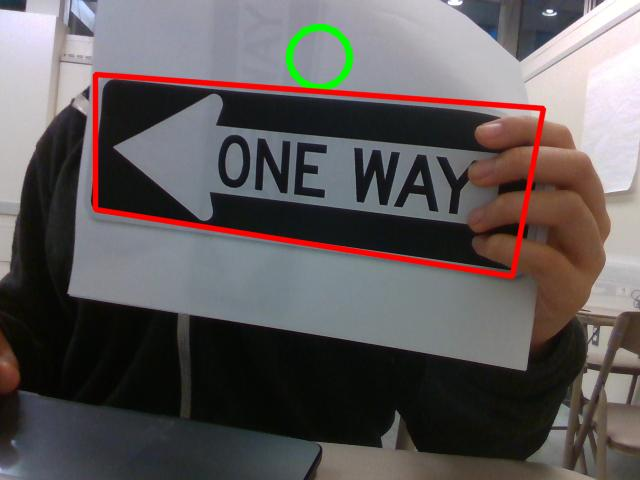

In [6]:
# mark location of SCREEN_CENTER (x-axis)
def identify_center(img):
    if SCREEN_CENTER < 0 or SCREEN_CENTER > img.shape[1]:
        print('SCREEN_CENTER out of bounds! Your image is: {}'.format(img.shape[:2]))
    cv2.circle(img, (int(SCREEN_CENTER), img.shape[0]/2), 5, (0,255,0), 3)
    return img

# display image
show_image(identify_center)

# <code>detect_sign_live</code>

<p style='font-size:1.75rem;line-height:1.5'>
    Let's put everything together! Complete the function below to detect and return the center coordinates of the one way sign.
    </p>

In [11]:
DEBUG = True     # True: show video. (better to set as False during actual race to prevent video delays!)
TEST_TIME = 10

In [12]:
# setup display
if DEBUG:
    display = IPython.display.display('', display_id=current_display_id)
    current_display_id += 1
query_columns = 0

# TASK #1: Read "one_way.jpg"


# TASK #2: Call 'get_keypoints', passing in the "one_way.jpg" we just read from above.
#          Save the outputs as 'kp_q' and 'des_q'


def detect_sign_live(frame):
    global kp_q, des_q
    
    # TASK #3: Call 'detect_sign'. Figure ut the arguments you need to pass in, as well as the outputs you need.

    
    frame, dst, x_center, y_center = find_object(frame, queryImage, detected, kp_q, kp_f, good_matches, query_columns)
    
    if DEBUG:
        # TASK #4: Draw a GREEN circle of radius 30 and thickness 5. 

        
        cv2.polylines(frame,[np.int32(dst)], True, (0, 0, 255), 3, cv2.LINE_AA)
        show_frame(frame)

rc.run(detect_sign_live, TEST_TIME)

''

# Matches: 4, Match Percentage: 0.0110192837466
# Matches: 0, Match Percentage: 0.0
# Matches: 1, Match Percentage: 0.00275482093664
# Matches: 3, Match Percentage: 0.00826446280992
# Matches: 7, Match Percentage: 0.0192837465565
# Matches: 12, Match Percentage: 0.0330578512397
# Matches: 11, Match Percentage: 0.030303030303
# Matches: 24, Match Percentage: 0.0661157024793
# Matches: 29, Match Percentage: 0.0798898071625
# Matches: 31, Match Percentage: 0.0853994490358
# Matches: 29, Match Percentage: 0.0798898071625
# Matches: 33, Match Percentage: 0.0909090909091
# Matches: 41, Match Percentage: 0.112947658402
# Matches: 47, Match Percentage: 0.129476584022
# Matches: 48, Match Percentage: 0.132231404959
# Matches: 43, Match Percentage: 0.118457300275
# Matches: 40, Match Percentage: 0.110192837466
# Matches: 35, Match Percentage: 0.0964187327824
# Matches: 46, Match Percentage: 0.126721763085
# Matches: 35, Match Percentage: 0.0964187327824
# Matches: 37, Match Percentage: 0.1019283

# Parameter Tuning

<p style='font-size:1.75rem;line-height:1.5'>
    Tune the following parameters to improve your sign detector!
    <ul style='font-size:1.75rem;line-height:1.5'>
        <li><code>nFeatures (int)</code>: maximum number of features we want to find in the image. The default value is 500.</li>
        <li><code>MATCH_TYPE (bool)</code>: True: use MIN_MATCH_COUNT to threshold good matches, False: use MIN_MATCH_PERCENTAGE to threshold good matches</li>
        <li><code>MIN_MATCH_COUNT (10)</code>: minimum number of matches required for an object to be considered "detected"</li>
        <li><code>MIN_MATCH_PERCENTAGE ()</code>: minimum match percentage required for an object to be considered "detected"
</li>
    </ul>
    </p>

---

# Save Your Work!

<p style='font-size:1.75rem;line-height:1.5'>
    Super awesome job on getting a working object detector! Now your racecar can identify any object it chooses using OpenCV ORB feature detection. That's AMAZING! 
    <br><br>You will need to <b>save your work</b> before continuing on to the next section:
    <ul style='font-size:1.75rem;line-height:1.5'>
        <li>Duplicate this file: <code>"03-SignDetection.ipynb"</code></li>
        <li>Move the duplicate copy to your <code>/back-up</code> folder.</li>
        <li>Duplicate <code>"ConeDetection.ipynb"</code></li>
        <li>Move the duplicate copy to your <code>/back-up</code> folder.</li>
        <li>Duplicate <code>"ConeDetection.ipynb"</code> again</li>
        <li>Rename the duplicate copy to <code>"SignDetection.ipynb"</code></li>
        <li>Continue working on <code>"SignDetection.ipynb"</code>, NOT <code>"03-SignDetection.ipynb"</code></li>
    </ul>
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    The instructions above are <b>very important</b> so that you do not lose all of your hard work! 
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    <b style='color:red'>Ask a TA for a check-off sticker before moving on to the next section.</b>
    </p>

---

# Checkpoint

<p style='font-size:1.75rem;line-height:1.5'>
    In order to attempt Sign Detection on the racecar, you MUST have completed BOTH Cone Detection AND 03-SignDetection. This challenge relies largely on previously written code from 03-SignDetection, as well as experience from Cone Detection.
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    If you have NOT completed BOTH Cone Detection AND 03-SignDetection, please complete these labs first before attempting the next sections.
    </p>


---

# Sign Detection

## Overview
<p style='font-size:1.75rem;line-height:1.5'>
    One other challenge from the final challenge is the ability to detect priority objects and drive towards it (without a line!). Correctly identifying objects will enable us to access even faster and shorter shortcuts! 
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    The objects that we will be identifying includes cones, traffic signs, and gateways. Now we will try detecting traffic signs (or more specifically, the "One Way" sign). Let's put everything together and make the racecars drive past the one way sign!
    </p>


## Brainstorm Ideas Together!
<p style='font-size:1.75rem;line-height:1.5'>
    After completing the lab above, you have all the tools needed to integrate sign detection into your final challenge.
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    <b style='color:blue'>Discuss with your partner how you will approach integrating sign detection.</b>
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    Look over your current functions. What does each function do? What do you need to integrate sign detection?
    </p>

<p style='font-size:1.75rem;line-height:1.5'>
    BIG HINT: The only thing you need is the center x coordinate from the detected object! Where is the center coordinate returned in the functions above? What functions do you need in order to get this center coordinate? How will the center coordinates of the object be used? (Another big hint: see the get_angle function).
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    <b style='color:blue'>Discuss your plan of action with a TA first before getting started.</b>
    </p>


## Getting Started
 
<p style='font-size:1.75rem;line-height:1.5'>
    There are many different ways to approach this problem. Start implementing your ideas after your team has agreed on a viable solution. Good luck!
    </p>
    
<p style='font-size:1.75rem;line-height:1.5'>
    <b style='color:red'>Remember to get a sticker from a TA before taking your car off the block!</b>
    </p>
    